# Importing Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#EDA - Heart Disease Dataset

FEATURE EXPLANATION
1. age (Age in years)
2.  sex : (1 = male, 0 = female)
3. cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina]
4. trestbps (Resting Blood Pressure in mm/hg )
5. chol (Serum Cholesterol in mg/dl)
6. fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
7. restecg (Resting ECG): [0: showing probable or definite left ventricular 
8. thalach (maximum heart rate achieved)
9. exang (Exercise Induced Angina): [1 = yes, 0 = no]
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope (the slope of the peak exercise ST segment): [0: downsloping; 1:  flat; 2: upsloping]
12. ca [number of major vessels (0–3)
13. thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
14. target: [0 = disease, 1 = no disease]

In [ ]:
# #column names
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
#read data
df = pd.read_csv('/content/processed.cleveland.data', names=col_names, header=None)


In [ ]:
df.shape

(303, 14)

303 instances, 14 attrbutes </br>

In [ ]:
#find null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
#cleaning 'ca' feature
#find unique values in 'ca'
df['ca'].unique()

#'ca' should have [0-3] values, hence we tackle the '?' 
print("unique values:", df['ca'].unique())
print("count for each value:", "\n", df.ca.value_counts(), "\n")

#preprocess
#611 values are missing for 'ca' i.e. '?'
#replace '?, 0, 1, 2' with NaN
df.loc[df['ca']=='?', 'ca'] = np.NaN

#result
print("unique values after processing:", df['ca'].unique())
print("count for each value after processing:", "\n", df.ca.value_counts())

unique values: ['0.0' '3.0' '2.0' '1.0' '?']
count for each value: 
 0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64 

unique values after processing: ['0.0' '3.0' '2.0' '1.0' nan]
count for each value after processing: 
 0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


In [ ]:
#cleaning 'thal' feature
#find unique values in 'thal'
df['thal'].unique()


print("unique values:", df['thal'].unique())
print("count for each value:", "\n", df.thal.value_counts(), "\n")

#preprocess
#486 values are missing for 'ca' i.e. '?'
#replace '? with NaN
df.loc[df['thal']=='?', 'thal'] = np.NaN

#result
print("unique values after processing:", df['thal'].unique())
print("count for each value after processing:", "\n", df.thal.value_counts())

unique values: ['6.0' '3.0' '7.0' '?']
count for each value: 
 3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64 

unique values after processing: ['6.0' '3.0' '7.0' nan]
count for each value after processing: 
 3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64


In [ ]:
#find range of each attribute
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        5
dtype: int64

In [ ]:
#find mssing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [ ]:

#replace missing values with median value
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No null values found

In [ ]:
#change datatype of 'ca' and 'thal' from object to float 

df['ca']=df.ca.astype(float)
df['thal']=df.thal.astype(float)
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [ ]:
#find duplicate rows and delete
duplicated= df.duplicated().sum()
duplicated
#no duplicates found

0

In [ ]:
# outlier removal
#define continuous variable & plot
continous_features = ['age','trestbps','chol','oldpeak', 'thalach']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature oldpeak, No of Outliers is 5
For the feature thalach, No of Outliers is 1


In [ ]:
outliers(df[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from oldpeak feature removed
Outliers from thalach feature removed


## Test Train split

In [ ]:
X = df.drop(['target'], axis = 1)
y = df['target']
#split train and test
X_HD_train, X_HD_test, Y_HD_train, Y_HD_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train+Val set:  ', X_HD_train.shape,  Y_HD_train.shape)
print ('Test set:   ', X_HD_test.shape,  Y_HD_test.shape)

Train+Val set:   (198, 13) (198,)
Test set:    (86, 13) (86,)


In [ ]:
Y_HD_train[Y_HD_train > 0] = 1
Y_HD_test[Y_HD_test > 0] = 1

## SVM, LR, KNN for Heart Disease

In [ ]:
#SVM Heart Disease disease
SVCModel =SVC(kernel= 'rbf', max_iter=1000,C=10,gamma='auto')
SVCModel = SVCModel.fit(X_HD_train, Y_HD_train)
y_HD_pred = SVCModel.predict(X_HD_test)
SVM_Acc=accuracy_score(Y_HD_test, y_HD_pred)
SVM_MSE=mean_squared_error(Y_HD_test, y_HD_pred)
print("SVM Accuracy for Heart Disease dataset", accuracy_score(Y_HD_test, y_HD_pred))

#LR Heart Disease disease
LGnModel =LogisticRegression(penalty='l1',solver='liblinear',C=1.0,random_state=50)
LGnModel = LGnModel.fit(X_HD_train, Y_HD_train)
y_HD_pred = LGnModel.predict(X_HD_test)
LR_MSE=mean_squared_error(Y_HD_test, y_HD_pred)
LR_Acc=accuracy_score(Y_HD_test, y_HD_pred)
print("LR Accuracy for Heart Disease dataset", accuracy_score(Y_HD_test, y_HD_pred))

#KNN Heart Disease disease
KNNModel = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
KNNModel = KNNModel.fit(X_HD_train, Y_HD_train)
y_HD_pred = KNNModel.predict(X_HD_test)
KNN_MSE=mean_squared_error(Y_HD_test, y_HD_pred)
KNN_Acc=accuracy_score(Y_HD_test, y_HD_pred)
print("KNN Accuracy for Heart Disease dataset", accuracy_score(Y_HD_test, y_HD_pred))


SVM Accuracy for Heart Disease dataset 0.6162790697674418
LR Accuracy for Heart Disease dataset 0.872093023255814
KNN Accuracy for Heart Disease dataset 0.627906976744186


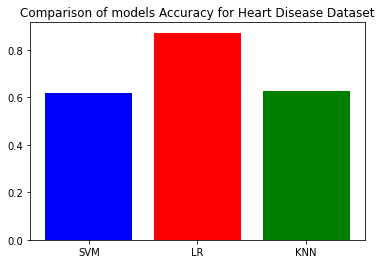

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
bars = ['SVM', 'LR', 'KNN']
height = [SVM_Acc, LR_Acc, KNN_Acc]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['blue', 'red', 'green'])
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models Accuracy for Heart Disease Dataset")
plt.show()

##Majority Voting

In [ ]:
VotingClassifierModel = VotingClassifier(estimators=[('SVCModel',SVCModel),('LGnModel',LGnModel),('KNNModel',KNNModel)])
VotingClassifierModel.fit(X_HD_train, Y_HD_train)

VotingClassifier(estimators=[('SVCModel',
                              SVC(C=10, gamma='auto', max_iter=1000)),
                             ('LGnModel',
                              LogisticRegression(penalty='l1', random_state=50,
                                                 solver='liblinear')),
                             ('KNNModel', KNeighborsClassifier())])

In [ ]:
y_HD_pred = VotingClassifierModel.predict(X_HD_test)
# Y_HD_test = np.argmax(Y_HD_test, axis=1)
print('Results for majority voting in heart disease dataset')
print(accuracy_score(Y_HD_test, y_HD_pred))
MV_HD=mean_squared_error(Y_HD_test, y_HD_pred)
MV_HD2=mean_absolute_error(Y_HD_test, y_HD_pred)
print("Classification Report for majority voting in heart disease dataset", "\n", classification_report(y_HD_pred, Y_HD_test))

Results for majority voting in heart disease dataset
0.7674418604651163
Classification Report for majority voting in heart disease dataset 
               precision    recall  f1-score   support

           0       0.96      0.74      0.84        69
           1       0.45      0.88      0.60        17

    accuracy                           0.77        86
   macro avg       0.71      0.81      0.72        86
weighted avg       0.86      0.77      0.79        86



## Stacking Classifier

In [ ]:
StackingClassifier = StackingClassifier(estimators=[('SVCModel',SVCModel),('LGnModel',LGnModel),('KNNModel',KNNModel)])
StackingClassifier.fit(X_HD_train, Y_HD_train)

StackingClassifier(estimators=[('SVCModel',
                                SVC(C=10, gamma='auto', max_iter=1000)),
                               ('LGnModel',
                                LogisticRegression(penalty='l1',
                                                   random_state=50,
                                                   solver='liblinear')),
                               ('KNNModel', KNeighborsClassifier())])

In [ ]:
y_HD_pred = StackingClassifier.predict(X_HD_test)
print('Results for Stacking in heart disease dataset')
S_HD=mean_squared_error(Y_HD_test, y_HD_pred)
S_HD2=mean_absolute_error(Y_HD_test, y_HD_pred)
print(accuracy_score(Y_HD_test, y_HD_pred))

Results for Stacking in heart disease dataset
0.8604651162790697


## Average Classifier

In [ ]:
SVCModel.fit(X_HD_train, Y_HD_train)
LGnModel.fit(X_HD_train, Y_HD_train)
KNNModel.fit(X_HD_train, Y_HD_train)


KNeighborsClassifier()

In [ ]:
svc_HD_pred = SVCModel.predict(X_HD_test)
lr_HD_pred = LGnModel.predict(X_HD_test)
knn_HD_pred = KNNModel.predict(X_HD_test)

In [ ]:
# final prediction after averaging on the prediction of all 3 models
HD_pred_final = (svc_HD_pred+lr_HD_pred+knn_HD_pred)/3.0
Avg_HD=mean_squared_error(Y_HD_test, HD_pred_final)
Avg_HD2=mean_absolute_error(Y_HD_test, y_HD_pred)

print("Majority Voting MSE for Heart Disease dataset", mean_squared_error(Y_HD_test, HD_pred_final))

Majority Voting MSE for Heart Disease dataset 0.18604651162790697


##Comparing all the models


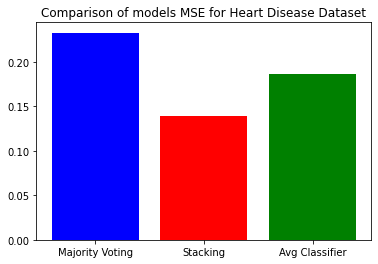

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
bars = ['Majority Voting', 'Stacking', 'Avg Classifier']
height = [MV_HD, S_HD, Avg_HD]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['blue', 'red', 'green'])
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models MSE for Heart Disease Dataset")
plt.show()

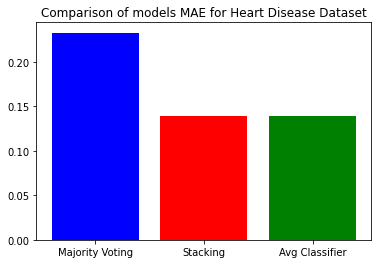

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
bars = ['Majority Voting', 'Stacking', 'Avg Classifier']
height = [MV_HD2, S_HD2, Avg_HD2]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['blue', 'red', 'green'])
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models MAE for Heart Disease Dataset")
plt.show()

# EDA- Breast Cancer

In [ ]:
df = pd.read_csv('/content/breast cancer data.csv')

In [ ]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [ ]:
df.shape


(569, 33)

In [ ]:
#find range of each attribute
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#drop last column that's empty
df.drop(columns=df.columns[-1], 
        axis=1, 
        inplace=True)

In [ ]:
df.shape

(569, 32)

In [ ]:
duplicated= df.duplicated().sum()
duplicated

0

In [ ]:
#convert target from string to int
df.diagnosis = pd.factorize(df.diagnosis)[0]

In [ ]:
df['diagnosis'].unique()

array([0, 1])

## Test Train split

In [ ]:
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']
#split train and test
X_HD_train, X_HD_test, Y_HD_train, Y_HD_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:  ', X_HD_train.shape,  Y_HD_train.shape)
print ('Test set:   ', X_HD_test.shape,  Y_HD_test.shape)

Train set:   (398, 31) (398,)
Test set:    (171, 31) (171,)


## SVM, LR, KNN for Breast Cancer

In [ ]:
#SVM breast cancer disease
SVCModel =SVC(kernel= 'rbf', max_iter=1000,C=10,gamma='auto')
SVCModel = SVCModel.fit(X_HD_train, Y_HD_train)
y_HD_pred = SVCModel.predict(X_HD_test)
SVM_Acc=accuracy_score(Y_HD_test, y_HD_pred)
SVM_MSE=mean_squared_error(Y_HD_test, y_HD_pred)
print(mean_squared_error(Y_HD_test, y_HD_pred))
print("SVM Accuracy for breast cancer dataset", accuracy_score(Y_HD_test, y_HD_pred))

#LR breast cancer disease
LGnModel =LogisticRegression(penalty='l1',solver='liblinear',C=1.0,random_state=50)
LGnModel = LGnModel.fit(X_HD_train, Y_HD_train)
y_HD_pred = LGnModel.predict(X_HD_test)
LR_MSE=mean_squared_error(Y_HD_test, y_HD_pred)
LR_Acc=accuracy_score(Y_HD_test, y_HD_pred)
print("LR Accuracy for breast cancer dataset", accuracy_score(Y_HD_test, y_HD_pred))

#KNN breast cancer disease
KNNModel = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
KNNModel = KNNModel.fit(X_HD_train, Y_HD_train)
y_HD_pred = KNNModel.predict(X_HD_test)
KNN_MSE=mean_squared_error(Y_HD_test, y_HD_pred)
KNN_Acc=accuracy_score(Y_HD_test, y_HD_pred)
print("KNN Accuracy for breast cancer dataset", accuracy_score(Y_HD_test, y_HD_pred))


0.3157894736842105
SVM Accuracy for breast cancer dataset 0.6842105263157895
LR Accuracy for breast cancer dataset 0.9239766081871345
KNN Accuracy for breast cancer dataset 0.7602339181286549


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


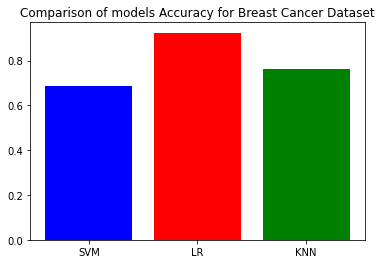

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
bars = ['SVM', 'LR', 'KNN']
height = [SVM_Acc, LR_Acc, KNN_Acc]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['blue', 'red', 'green'])
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models Accuracy for Breast Cancer Dataset")
plt.show()

##Majority Voting

In [ ]:
VotingClassifierModel = VotingClassifier(estimators=[('SVCModel',SVCModel),('LGnModel',LGnModel),('KNNModel',KNNModel)])
VotingClassifierModel.fit(X_HD_train, Y_HD_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


VotingClassifier(estimators=[('SVCModel',
                              SVC(C=10, gamma='auto', max_iter=1000)),
                             ('LGnModel',
                              LogisticRegression(penalty='l1', random_state=50,
                                                 solver='liblinear')),
                             ('KNNModel', KNeighborsClassifier())])

In [ ]:
y_HD_pred = VotingClassifierModel.predict(X_HD_test)
# Y_HD_test = np.argmax(Y_HD_test, axis=1)
print('Results for majority voting in Breast Cancer dataset')
MV_BC=mean_squared_error(Y_HD_test, y_HD_pred)
MV_BC2=mean_absolute_error(Y_HD_test, y_HD_pred)
print("Majority Voting Accuracy for Liver dataset", accuracy_score(Y_HD_test, y_HD_pred))

print("Classification Report for majority voting in Breast Cancer dataset", "\n", classification_report(y_HD_pred, Y_HD_test))


Results for majority voting in Breast Cancer dataset
Majority Voting Accuracy for Liver dataset 0.8187134502923976
Classification Report for majority voting in Breast Cancer dataset 
               precision    recall  f1-score   support

           0       0.43      1.00      0.60        23
           1       1.00      0.79      0.88       148

    accuracy                           0.82       171
   macro avg       0.71      0.90      0.74       171
weighted avg       0.92      0.82      0.84       171



## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
StackingClassifier = StackingClassifier(estimators=[('SVCModel',SVCModel),('LGnModel',LGnModel),('KNNModel',KNNModel)])
StackingClassifier.fit(X_HD_train, Y_HD_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


StackingClassifier(estimators=[('SVCModel',
                                SVC(C=10, gamma='auto', max_iter=1000)),
                               ('LGnModel',
                                LogisticRegression(penalty='l1',
                                                   random_state=50,
                                                   solver='liblinear')),
                               ('KNNModel', KNeighborsClassifier())])

In [ ]:
y_HD_pred = StackingClassifier.predict(X_HD_test)
print('Results for Stacking in Breast cancer dataset')
S_BC=mean_squared_error(Y_HD_test, y_HD_pred)
S_BC2=mean_absolute_error(Y_HD_test, y_HD_pred)
print("Stacking Classifier Accuracy for Breast cancer dataset", accuracy_score(Y_HD_test, y_HD_pred))

Results for Stacking in Breast cancer dataset
Stacking Classifier Accuracy for Breast cancer dataset 0.9298245614035088


## Averaging Classifier

In [ ]:
svc_BC_pred = SVCModel.predict(X_HD_test)
lr_BC_pred = LGnModel.predict(X_HD_test)
knn_BC_pred = KNNModel.predict(X_HD_test)

In [ ]:
# final prediction after averaging on the prediction of all 3 models
HD_pred_final = (svc_BC_pred+lr_BC_pred+knn_BC_pred)/3.0
Avg_BC=mean_squared_error(Y_HD_test, HD_pred_final)
Avg_BC2=mean_absolute_error(Y_HD_test, y_HD_pred)

print("Majority Voting MSE for Liver dataset", mean_squared_error(Y_HD_test, HD_pred_final))

Majority Voting MSE for Liver dataset 0.11825860948667966


##Comparing all the models


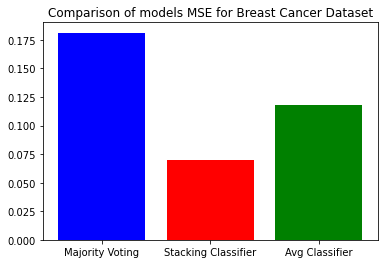

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
bars = ['Majority Voting', 'Stacking Classifier', 'Avg Classifier']
height = [MV_BC, S_BC, Avg_BC]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['blue', 'red', 'green'])
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models MSE for Breast Cancer Dataset")
plt.show()

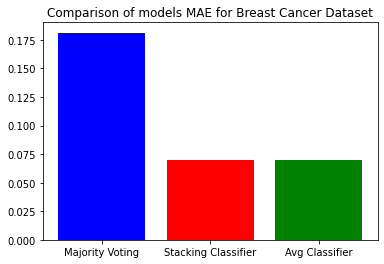

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
bars = ['Majority Voting', 'Stacking Classifier', 'Avg Classifier']
height = [MV_BC2, S_BC2, Avg_BC2]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['blue', 'red', 'green'])
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models MAE for Breast Cancer Dataset")
plt.show()

#EDA - Liver Dataset

In [ ]:
df = pd.read_csv('/content/indian_liver_patient.csv')
df.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1


In [ ]:
#find range of each attribute
df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
#find null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
#replace null values with median value
df = df.fillna(df.median())
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
#find and remove duplicate values
duplicated= df.duplicated().sum()
duplicated

13

In [ ]:
#remove duplicate rows
df.drop_duplicates()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
#convert Gender from string to int
df.Gender = pd.factorize(df.Gender)[0]

## Test Train split

In [ ]:
X = df.drop(['Dataset'], axis = 1)
y = df['Dataset']
#split train and test
X_HD_train, X_HD_test, Y_HD_train, Y_HD_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:  ', X_HD_train.shape,  Y_HD_train.shape)
print ('Test set:   ', X_HD_test.shape,  Y_HD_test.shape)

Train set:   (408, 10) (408,)
Test set:    (175, 10) (175,)


## SVM, LR, KNN for Liver Diseaser

In [ ]:
#SVM Liver disease
SVCModel =SVC(kernel= 'rbf', max_iter=1000,C=10,gamma='auto')
SVCModel = SVCModel.fit(X_HD_train, Y_HD_train)
y_HD_pred = SVCModel.predict(X_HD_test)
SVM_Acc=accuracy_score(Y_HD_test, y_HD_pred)
SVM_MSE=mean_squared_error(Y_HD_test, y_HD_pred)
print(mean_squared_error(Y_HD_test, y_HD_pred))
print("SVM Accuracy for Liver dataset", accuracy_score(Y_HD_test, y_HD_pred))

#LR Liver disease
LGnModel =LogisticRegression(penalty='l1',solver='liblinear',C=1.0,random_state=50)
LGnModel = LGnModel.fit(X_HD_train, Y_HD_train)
y_HD_pred = LGnModel.predict(X_HD_test)
LR_MSE=mean_squared_error(Y_HD_test, y_HD_pred)
LR_Acc=accuracy_score(Y_HD_test, y_HD_pred)
print("LR Accuracy for Liver dataset", accuracy_score(Y_HD_test, y_HD_pred))

#KNN Liver disease
KNNModel = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
KNNModel = KNNModel.fit(X_HD_train, Y_HD_train)
y_HD_pred = KNNModel.predict(X_HD_test)
KNN_MSE=mean_squared_error(Y_HD_test, y_HD_pred)
KNN_Acc=accuracy_score(Y_HD_test, y_HD_pred)
print("KNN Accuracy for Liver dataset", accuracy_score(Y_HD_test, y_HD_pred))

0.26857142857142857
SVM Accuracy for Liver dataset 0.7314285714285714
LR Accuracy for Liver dataset 0.72
KNN Accuracy for Liver dataset 0.6457142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


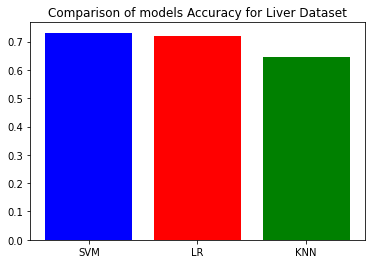

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
bars = ['SVM', 'LR', 'KNN']
height = [SVM_Acc, LR_Acc, KNN_Acc]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['blue', 'red', 'green'])
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models Accuracy for Liver Dataset")
plt.show()

##Majority Voting

In [ ]:
VotingClassifierModel = VotingClassifier(estimators=[('SVCModel',SVCModel),('LGnModel',LGnModel),('KNNModel',KNNModel)])
VotingClassifierModel.fit(X_HD_train, Y_HD_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


VotingClassifier(estimators=[('SVCModel',
                              SVC(C=10, gamma='auto', max_iter=1000)),
                             ('LGnModel',
                              LogisticRegression(penalty='l1', random_state=50,
                                                 solver='liblinear')),
                             ('KNNModel', KNeighborsClassifier())])

In [ ]:
y_HD_pred = VotingClassifierModel.predict(X_HD_test)
# Y_HD_test = np.argmax(Y_HD_test, axis=1)
print('Results for majority voting in Breast Cancer dataset')
MV_LD=mean_squared_error(Y_HD_test, y_HD_pred)
MV_LD2=mean_absolute_error(Y_HD_test, y_HD_pred)
print("Majority Voting Accuracy for Liver dataset", accuracy_score(Y_HD_test, y_HD_pred))

print("Classification Report for majority voting in Breast Cancer dataset", "\n", classification_report(y_HD_pred, Y_HD_test))

Results for majority voting in Breast Cancer dataset
Majority Voting Accuracy for Liver dataset 0.7371428571428571
Classification Report for majority voting in Breast Cancer dataset 
               precision    recall  f1-score   support

           1       0.98      0.74      0.84       166
           2       0.12      0.67      0.21         9

    accuracy                           0.74       175
   macro avg       0.55      0.70      0.52       175
weighted avg       0.93      0.74      0.81       175



## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
StackingClassifier = StackingClassifier(estimators=[('SVCModel',SVCModel),('LGnModel',LGnModel),('KNNModel',KNNModel)])
StackingClassifier.fit(X_HD_train, Y_HD_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


StackingClassifier(estimators=[('SVCModel',
                                SVC(C=10, gamma='auto', max_iter=1000)),
                               ('LGnModel',
                                LogisticRegression(penalty='l1',
                                                   random_state=50,
                                                   solver='liblinear')),
                               ('KNNModel', KNeighborsClassifier())])

In [ ]:
y_HD_pred = StackingClassifier.predict(X_HD_test)
print('Results for Stacking in Liver Disease dataset')
S_LD=mean_squared_error(Y_HD_test, y_HD_pred)
S_LD2=mean_absolute_error(Y_HD_test, y_HD_pred)
print("Stacking Classifier Accuracy for Liver dataset", accuracy_score(Y_HD_test, y_HD_pred))

Results for Stacking in Liver Disease dataset
Stacking Classifier Accuracy for Liver dataset 0.7085714285714285


## Averaging Classifier

In [ ]:
svc_BC_pred = SVCModel.predict(X_HD_test)
lr_BC_pred = LGnModel.predict(X_HD_test)
knn_BC_pred = KNNModel.predict(X_HD_test)

In [ ]:
from sklearn.metrics import mean_squared_error
# final prediction after averaging on the prediction of all 3 models
HD_pred_final = (svc_BC_pred+lr_BC_pred+knn_BC_pred)/3.0
Avg_LD=mean_squared_error(Y_HD_test, HD_pred_final)
Avg_LD2=mean_absolute_error(Y_HD_test, y_HD_pred)

print("Majority Voting MSE for Liver dataset", mean_squared_error(Y_HD_test, HD_pred_final))

Majority Voting MSE for Liver dataset 0.22984126984126987


##Comparing all the models


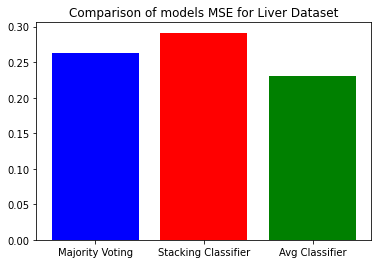

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
bars = ['Majority Voting', 'Stacking Classifier', 'Avg Classifier']
height = [MV_LD, S_LD, Avg_LD]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['blue', 'red', 'green'])
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models MSE for Liver Dataset")
plt.show()

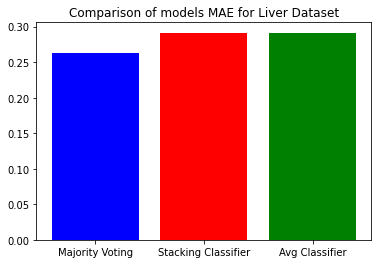

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
bars = ['Majority Voting', 'Stacking Classifier', 'Avg Classifier']
height = [MV_LD2, S_LD2, Avg_LD2]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['blue', 'red', 'green'])
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models MAE for Liver Dataset")
plt.show()